This script process statistics related to the experiments ran from the benchmark created 

TODO: Agregar urls, referencias, etc...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Atributes that are going to be considered for tracking during iterations

In [8]:
# Data that we'll keep track of

CLASES = [
    "org.openscience.cdk.index.CASNumber",
    "se.kth.cid.identity.ResourceURL",
    "se.kth.cid.identity.URI",
    "se.kth.cid.identity.URIClassifier",
    "se.kth.cid.identity.URIUtil",
    "se.kth.cid.identity.PathURN",
    "se.kth.cid.identity.URN",
    "se.kth.cid.identity.MIMEType",
    "stempeluhr.validation.TimeChecker",
    "org.jxpfw.util.InternationalBankAccountNumber",
    "org.jxpfw.util.CLocale",
    "com.prowidesoftware.swift.model.IBAN",
    "com.prowidesoftware.swift.model.BIC",
    "com.sun.jndi.toolkit.url.ConcreteURLContext",
    "java.util.regex.Pattern",
    "java.util.ArrayList",
    "org.apache.commons.cli.CommandLine",
    "org.jdom.Attribute",
    "org.apache.commons.codec.language.DoubleMetaphone",
    "org.joda.time.DateTime",
    "org.joda.time.format.DateTimeFormat",
    "org.jgrapht.alg.BellmanFordIterator",
    "org.apache.commons.math3.transform.FastFourierTransformer",
    "net.n3.nanoxml.XMLElement"
]

TIME_ATTRS = [
    "Time_Check JUnit",
    "Time_Coverage Analysis",
    "Time_Done",
    "Time_Generating assertions",
    "Time_Initializing",
    "Time_Inlining",
    "Time_JUnit",
    "Time_Minimizing",
    "Time_Search",
    "Time_Statistics"
]

COLUMNS = [
    "Coverage",
    "AvgPathConditionLength",
    "Fitness",
    "MaxPathConditionLength",
    "MinPathConditionLength",
    "NumberOfPathsDiverged",
    "NumberOfPathsExplored",
    "NumberOfSATQueries"
    "NumberOfUsefulNewTests",
    "NumberOfTimeoutQueries",
    "NumberOfUNSATQueries",
    "NumberOfUnusefulNewTests",
    "Predicates",
    "Time_Check JUnit",
    "Time_Coverage Analysis",
    "Time_Done",
    "Time_Generating assertions",
    "Time_Initializing",
    "Time_Inlining",
    "Time_JUnit",
    "Time_Minimizing",
    "Time_Search",
    "Time_Statistics"
    "TotalNumberOfConstraints",
    "TotalTimeSpentExecutingConcolicaly",
    "TotalTimeSpentSolvingConstraints",
    "Total_Time"
]

Init of internal data representation
## Main idea
For each tested class, track differences through iterations
## Structure 
Class -> attribute -> algorithm_version -> iteration value

In [9]:
print(COLUMNS)

['Coverage', 'AvgPathConditionLength', 'Fitness', 'MaxPathConditionLength', 'MinPathConditionLength', 'NumberOfPathsDiverged', 'NumberOfPathsExplored', 'NumberOfSATQueriesNumberOfUsefulNewTests', 'NumberOfTimeoutQueries', 'NumberOfUNSATQueries', 'NumberOfUnusefulNewTests', 'Predicates', 'Time_Check JUnit', 'Time_Coverage Analysis', 'Time_Done', 'Time_Generating assertions', 'Time_Initializing', 'Time_Inlining', 'Time_JUnit', 'Time_Minimizing', 'Time_Search', 'Time_StatisticsTotalNumberOfConstraints', 'TotalTimeSpentExecutingConcolicaly', 'TotalTimeSpentSolvingConstraints', 'Total_Time']


In [10]:
data = dict()

for claz in CLASES:
    data[claz] = dict()
    
    for col in COLUMNS:
        data[claz][col] = dict()
        data[claz][col]["new_algorithm"] = []
        data[claz][col]["old_algorithm"] = []

## Data recolection

In [12]:
for iteration_index in range(1, 11):
    iteration_new_data = pd.read_csv(
        '../Benchmarks/clases_del_paper/repos/jars/report_new_algoritmo/statistics-iteration-{}.csv'
            .format(iteration_index)
    )
    iteration_old_data = pd.read_csv(
        '../Benchmarks/clases_del_paper/repos/jars/report_old_algoritmo/statistics-iteration-{}.csv'
            .format(iteration_index)
    )
    
    for index, claz in enumerate(iteration_old_data.loc[:, "TARGET_CLASS"].to_numpy()):
        for col in COLUMNS:
            
            # If for any reason the experiment data is not there, we just skip it
            # TODO: why this may happen??? 
            if (claz in iteration_old_data.loc[:, "TARGET_CLASS"].to_numpy() 
                and col  in iteration_old_data.columns):
                data[claz][col]["old_algorithm"].append(
                    iteration_old_data.loc[index, col]
                )
    
    for index, claz in enumerate(iteration_new_data.loc[:, "TARGET_CLASS"].to_numpy()):
        for col in COLUMNS:
            
            # If for any reason the experiment data is not there, we just skip it
            # TODO: why this may happen???             
            if (claz in iteration_new_data.loc[:, "TARGET_CLASS"].to_numpy() 
                and col  in iteration_new_data.columns):

                data[claz][col]["new_algorithm"].append(
                    iteration_new_data.loc[index, col]
                )

# Data showoff


In [15]:
data["org.joda.time.format.DateTimeFormat"]

{'Coverage': {'new_algorithm': [0.388663967611336,
   0.5020242914979757,
   0.5020242914979757,
   0.5101214574898786,
   0.4534412955465587,
   0.4493927125506073,
   0.4777327935222672,
   0.4412955465587045,
   0.4453441295546559,
   0.4615384615384616],
  'old_algorithm': [0.6187363834422658,
   0.6013071895424836,
   0.6318082788671024,
   0.6056644880174292,
   0.6034858387799564]},
 'AvgPathConditionLength': {'new_algorithm': [73.41919805589309,
   187.28490990990971,
   317.1706864564007,
   296.43812709030084,
   72.88402366863906,
   72.7540415704388,
   164.1932479627474,
   99.60672514619871,
   81.06935123042503,
   99.11658653846158],
  'old_algorithm': [0.0, 0.0, 0.0, 0.0, 0.0]},
 'Fitness': {'new_algorithm': [76.21608115115373,
   64.14824179017725,
   66.1693164362519,
   68.6508051765491,
   69.17449229691876,
   72.73899401997029,
   65.57271894771893,
   78.34042480301471,
   69.17049682593161,
   69.22969390683942],
  'old_algorithm': [150.70816434697784,
   160.9

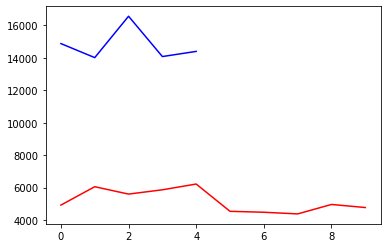

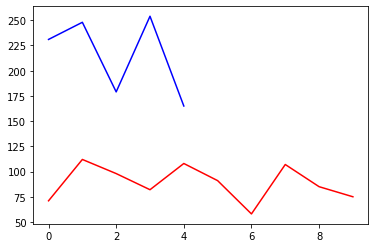

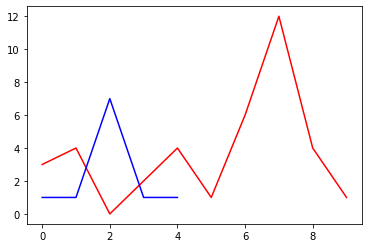

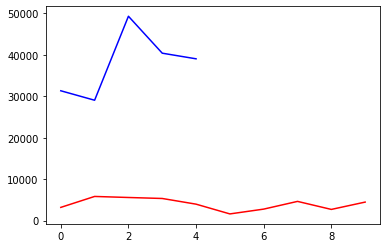

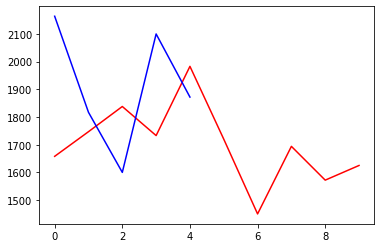

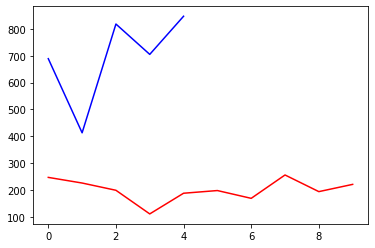

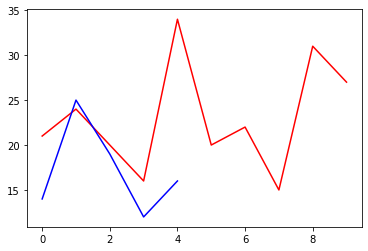

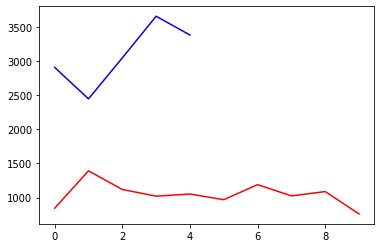

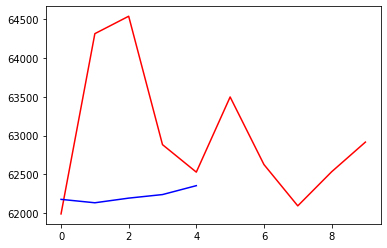

KeyError: 'Time_Statistics'

In [14]:
for attr in TIME_ATTRS:
    plt.plot(data["org.joda.time.format.DateTimeFormat"][attr]["new_algorithm"], color='red')
    plt.plot(data["org.joda.time.format.DateTimeFormat"][attr]["old_algorithm"], color='blue')
    # plt.plot([1, 2, 3, 4])
    # plt.ylabel('total_time comparissons for dateTimeFormat')
    plt.show()